In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/McDonald_s_Reviews.csv',encoding = 'latin-1')

In [ ]:
data.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [ ]:
mcd = data.groupby('review_time')['review'].apply(' '.join)
mcd = pd.DataFrame(mcd)
mcd.reset_index(inplace = True)

In [ ]:
mcd.head(20)

,review_time,review
0,10 months ago,Can't believe experience with order taker. Wen...
1,10 years ago,"Service, overall, better than most McDs. McDon..."
2,11 months ago,If you didnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...
3,11 years ago,Slow service Terrible They renovated their sto...
4,12 years ago,Neutral When breakfast was over the manager ca...
5,2 days ago,"Brodheadsville, Pa.\n\nLast time this location..."
6,2 months ago,"I repeat my order 3 times in the drive thru, a..."
7,2 weeks ago,Slowest place and folks do t care. Excellent ...
8,2 years ago,(Sarcasm) this was exactly what I ordered! A 2...
9,20 hours ago,They always mess up orders or give you the wro...


# Sentiment analysis

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sentiments = []
for review in mcd['review']:
    sentiment = sia.polarity_scores(review)
    sentiments.append(sentiment)

In [ ]:
sentiment_labels = []
for sentiment in sentiments:
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        sentiment_labels.append('Positive')
    elif compound_score <= -0.05:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

In [ ]:
mcd['sentiment'] = sentiment_labels

In [ ]:
mcd[['review', 'sentiment']]

,review,sentiment
0,Can't believe experience with order taker. Wen...,Positive
1,"Service, overall, better than most McDs. McDon...",Positive
2,If you didnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,Positive
3,Slow service Terrible They renovated their sto...,Negative
4,Neutral When breakfast was over the manager ca...,Positive
5,"Brodheadsville, Pa.\n\nLast time this location...",Positive
6,"I repeat my order 3 times in the drive thru, a...",Positive
7,Slowest place and folks do t care. Excellent ...,Positive
8,(Sarcasm) this was exactly what I ordered! A 2...,Positive
9,They always mess up orders or give you the wro...,Negative


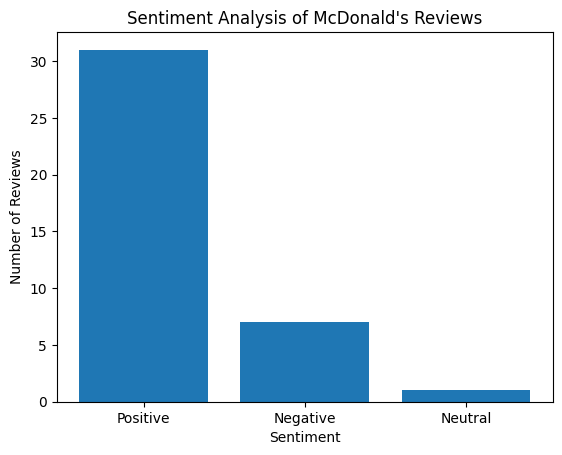

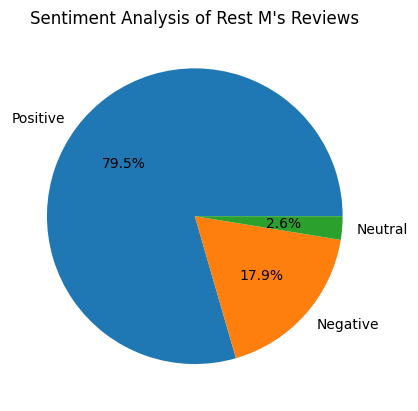

In [ ]:

import matplotlib.pyplot as plt

# Create a bar chart showing the number of reviews for each sentiment
sentiment_counts = mcd['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of McDonald\'s Reviews')
plt.show()

# Create a pie chart showing the percentage of reviews for each sentiment
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Analysis of Rest M\'s Reviews')
plt.show()


# rating analysis

In [ ]:

import re
data['rating'] = data['rating'].apply(lambda x: re.sub(r'[^\d.]', '', x))


In [ ]:
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1


In [ ]:

data['sentiment_rating'] = 'Neutral'
data.loc[data['rating'].astype(float) < 3, 'sentiment_rating'] = 'Negative'
data.loc[data['rating'].astype(float) > 3, 'sentiment_rating'] = 'Positive'

data.head()


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,sentiment_rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,Negative
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,Positive
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,Negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,Positive
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,Negative


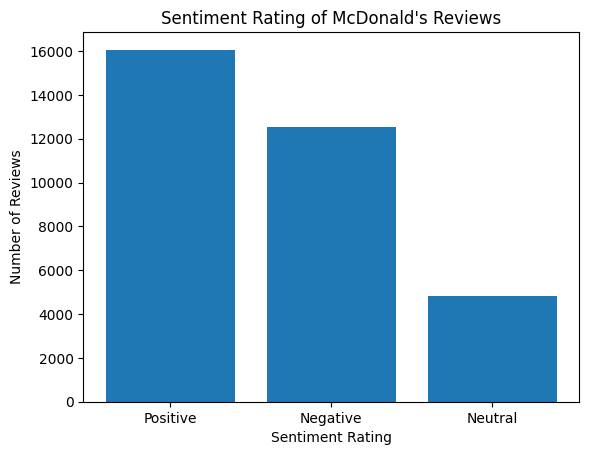

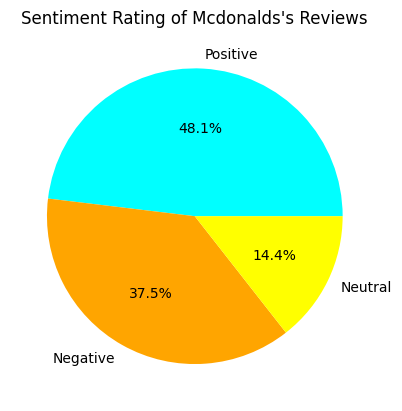

In [ ]:


import matplotlib.pyplot as plt

# Count the number of reviews for each sentiment rating
sentiment_counts = data['sentiment_rating'].value_counts()

# Create a bar chart of the sentiment ratings
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Rating')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Rating of McDonald\'s Reviews')
plt.show()

# Create a pie chart of the sentiment ratings
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['cyan', 'orange', 'yellow'])
plt.title('Sentiment Rating of Mcdonalds\'s Reviews')
plt.show()


([<matplotlib.patches.Wedge at 0x7da5bb334e50>,
 [Text(0.0658760617292821, 1.0980256574830298, 'Positive'),
  Text(-0.5400230001065748, -0.9583189236135821, 'Negative'),
  Text(0.9889394133358957, -0.4816625756178846, 'Neutral')],
 [Text(0.03593239730688114, 0.5989230858998345, '48.1%'),
  Text(-0.29455800005813165, -0.5227194128801357, '37.5%'),
  Text(0.5394214981832158, -0.26272504124611884, '14.4%')])

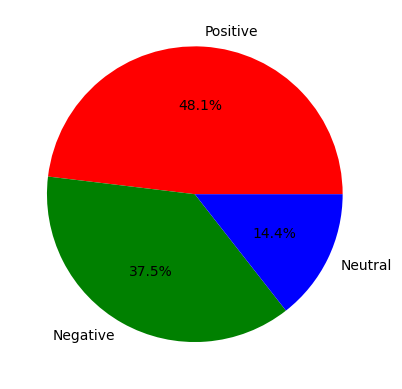

In [ ]:


import matplotlib.pyplot as plt
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'green', 'blue'])


# Bad words count

In [ ]:
negative_reviews = data[data['sentiment_rating'] == 'Negative']

In [ ]:
Neg_review = negative_reviews['review']

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

Neg_review = Neg_review.apply(lambda x: ' '.join([word.lower() for word in x.split() if word.isalpha()]))
Neg_review.head()


0    why does it look like someone spit on my i had...
2    made a mobile order got to the speaker and che...
4    i repeat my order times in the drive and she s...
5    i work for door dash and they locked us all ou...
6    if i could give this location a zero on custom...
Name: review, dtype: object

In [ ]:
#removing stop words for Neg_review
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopword = nltk.corpus.stopwords.words('english')

def remove_stop_words(text):
  tokens = word_tokenize(text)
  filtered_text = [token for token in tokens if token not in stop_words]
  return ' '.join(filtered_text)

Neg_review = Neg_review.apply(remove_stop_words)
Neg_review.head()


0    look like someone spit normal everyone chill d...
2    made mobile order got speaker checked line mov...
4    repeat order times drive still manage mess sup...
5    work door dash locked us wait long line reason...
6    could give location zero customer pulled drive...
Name: review, dtype: object

In [ ]:

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  tokens = word_tokenize(text)
  lemmatized_text = [lemmatizer.lemmatize(token) for token in tokens]
  return ' '.join(lemmatized_text)

Neg_review = Neg_review.apply(lemmatize_text)
Neg_review.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


0    look like someone spit normal everyone chill d...
2    made mobile order got speaker checked line mov...
4    repeat order time drive still manage mess supp...
5    work door dash locked u wait long line reason ...
6    could give location zero customer pulled drive...
Name: review, dtype: object

In [ ]:


nltk.download('averaged_perceptron_tagger')

def extract_adjectives(text):
  pos_tags = nltk.pos_tag(word_tokenize(text))
  adjectives = [word for word, pos in pos_tags if pos.startswith('JJ')]
  return ' '.join(adjectives)

Neg_review2 = Neg_review.apply(extract_adjectives)
Neg_review2.head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0                                         normal milky
2                               mobile leave late next
4    suppose large double large wrong need close un...
5                                           u open new
6    simple regular pull minute young front young r...
Name: review, dtype: object

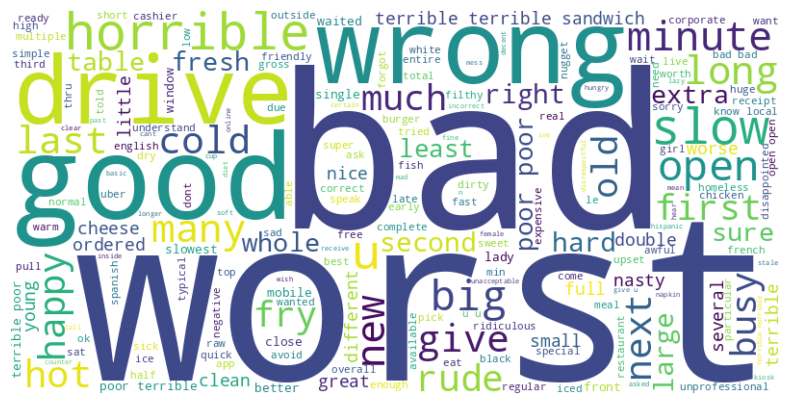

In [ ]:


import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a word cloud of the negative reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(Neg_review2))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


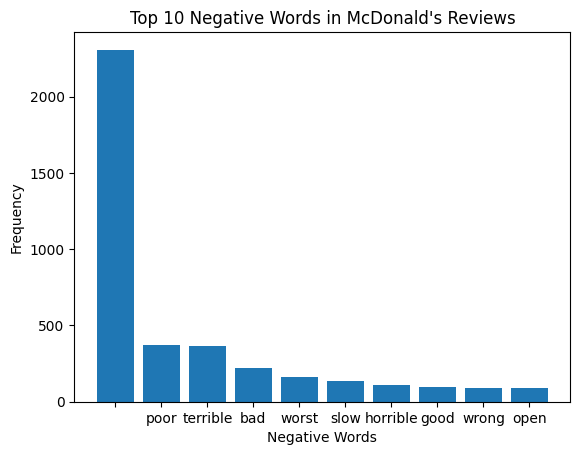

In [ ]:


import matplotlib.pyplot as plt
# Get the top 10 negative words
top_negative_words = Neg_review2.value_counts().head(10)

# Plot the top 10 negative words
plt.bar(top_negative_words.index, top_negative_words.values)
plt.xlabel('Negative Words')
plt.ylabel('Frequency')
plt.title('Top 10 Negative Words in McDonald\'s Reviews')
plt.show()


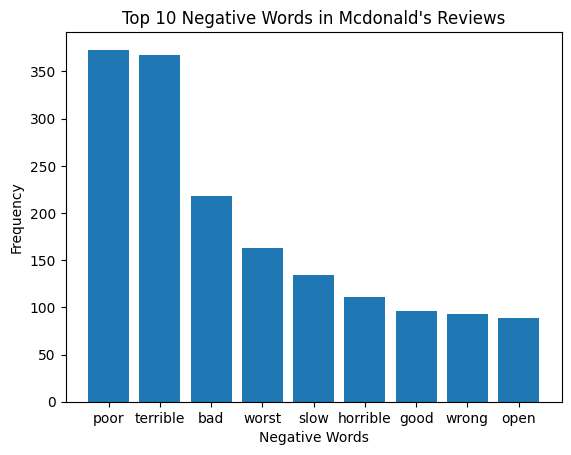

In [ ]:


import matplotlib.pyplot as plt
# Get the top 10 negative words, skipping the first one
top_negative_words = Neg_review2.value_counts()[1:10]

# Plot the top 10 negative words, starting with the second most frequent
plt.bar(top_negative_words.index, top_negative_words.values)
plt.xlabel('Negative Words')
plt.ylabel('Frequency')
plt.title('Top 10 Negative Words in Mcdonald\'s Reviews')
plt.show()


# text cluster

In [ ]:
Neg_review.head()

0    look like someone spit normal everyone chill d...
2    made mobile order got speaker checked line mov...
4    repeat order time drive still manage mess supp...
5    work door dash locked u wait long line reason ...
6    could give location zero customer pulled drive...
Name: review, dtype: object

In [ ]:

Neg_review = Neg_review.to_frame(name="bad_review")
Neg_review.head()


,bad_review
0,look like someone spit normal everyone chill d...
2,made mobile order got speaker checked line mov...
4,repeat order time drive still manage mess supp...
5,work door dash locked u wait long line reason ...
6,could give location zero customer pulled drive...


In [ ]:

Neg_review['bad_review'] = Neg_review['bad_review'].astype(str)
Neg_review.head()

,bad_review
0,look like someone spit normal everyone chill d...
2,made mobile order got speaker checked line mov...
4,repeat order time drive still manage mess supp...
5,work door dash locked u wait long line reason ...
6,could give location zero customer pulled drive...


In [ ]:

def categorize_reviews(reviews):
  food_words = ['food', 'burger', 'fries', 'chicken', 'drink', 'taste', 'flavor', 'menu', 'item']
  customer_experience_words = ['service', 'staff', 'employee', 'manager', 'attitude', 'helpfulness', 'experience']
  service_words = ['clean', 'dirty', 'wait', 'time', 'speed', 'quality', 'atmosphere', 'environment']

  categorized_reviews = []
  for review in reviews:
    category = None
    for word in food_words:
      if word in review:
        category = 'food'
        break
    if category is None:
      for word in customer_experience_words:
        if word in review:
          category = 'customer_experience'
          break
    if category is None:
      for word in service_words:
        if word in review:
          category = 'service'
          break
    if category is None:
      category = 'other'
    categorized_reviews.append(category)

  Neg_review['category'] = categorized_reviews

  return Neg_review

Neg_review = categorize_reviews(Neg_review['bad_review'])
Neg_review.head()



,bad_review,category
0,look like someone spit normal everyone chill d...,other
2,made mobile order got speaker checked line mov...,customer_experience
4,repeat order time drive still manage mess supp...,service
5,work door dash locked u wait long line reason ...,service
6,could give location zero customer pulled drive...,food


In [ ]:
Neg_review = Neg_review[Neg_review['category'] != 'other']

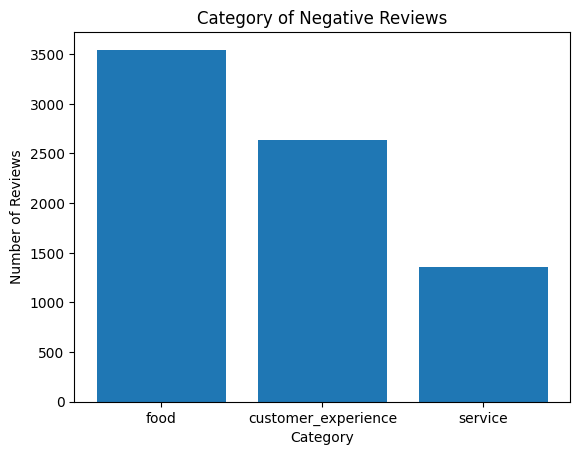

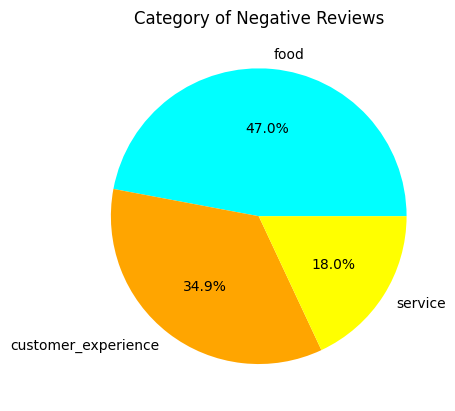

In [ ]:

import matplotlib.pyplot as plt

category_counts = Neg_review['category'].value_counts()

# Create a bar chart of the sentiment ratings
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Category of Negative Reviews')
plt.show()

# Create a pie chart of the sentiment ratings
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', colors=['cyan', 'orange', 'yellow'])
plt.title('Category of Negative Reviews')
plt.show()
